In [226]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import ascii
import numpy as np
from astropy.io import fits

SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)

# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rc('font', family='Times New Roman')

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
import seaborn as sns
sns.set_palette("muted")

In [5]:
r

0.692709012440737
1.3295739742362471
2.5519618212237503
4.898192400858816
9.401507732715986
18.045095091164857


In [216]:
wgplusses = []
wgcrosses = []
ggs = []

In [217]:
wgplussesDM_x = []
wgcrossesDM_x = []
ggsDM_x = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS2_DM_LH_x/wgp_LH{i}.dat',f'OUTPUT_CAMELS2_DM_LH_x/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplussesDM_x.append(wgp)
    wgcrossesDM_x.append(wgx)
    ggsDM_x.append(wgg)
    wgplusses.append(wgp)
    wgcrosses.append(wgx)
    ggs.append(wgg)

In [218]:
wgplussesDM_y = []
wgcrossesDM_y = []
ggsDM_y = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS2_DM_LH_y/wgp_LH{i}.dat',f'OUTPUT_CAMELS2_DM_LH_y/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplussesDM_y.append(wgp)
    wgcrossesDM_y.append(wgx)
    ggsDM_y.append(wgg)
    wgplusses.append(wgp)
    wgcrosses.append(wgx)
    ggs.append(wgg)

In [219]:
wgplussesDM_z = []
wgcrossesDM_z = []
ggsDM_z = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS2_DM_LH_z/wgp_LH{i}.dat',f'OUTPUT_CAMELS2_DM_LH_z/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplussesDM_z.append(wgp)
    wgcrossesDM_z.append(wgx)
    ggsDM_z.append(wgg)
    wgplusses.append(wgp)
    wgcrosses.append(wgx)
    ggs.append(wgg)

In [224]:
wgplusses = np.array(wgplusses)
wgcrosses = np.array(wgcrosses)
wgplussesDM_x = np.array(wgplussesDM_x); wgplussesDM_y = np.array(wgplussesDM_y); wgplussesDM_z = np.array(wgplussesDM_z)
wgcrossesDM_x = np.array(wgcrossesDM_x); wgcrossesDM_y = np.array(wgcrossesDM_y); wgcrossesDM_z = np.array(wgcrossesDM_z)
ggs = np.array(ggs)
print(np.sum(np.isnan(wgplusses)), np.sum(np.isnan(wgcrosses)))

np.savez("../wdplus_data.npz", r=r, x=wgplussesDM_x, y=wgplussesDM_y, z=wgplussesDM_z)
np.savez("../wdcross_data.npz", r=r, x=wgcrossesDM_x, y=wgcrossesDM_y, z=wgcrossesDM_z)
np.savez("../wdd_data.npz", r=r, wgg=ggs)

0 0


In [121]:
for i in range(0,1):
    for j, f in enumerate((f'OUTPUT_CAMELS_DM_LH_z/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_LH_z/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
            print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    


['rnom', 'meanr', 'meanlogr', 'wgplus', 'wgcross', 'noise', 'DSpairs', 'RSpairs']


In [123]:
dat

rnom,meanr,meanlogr,wgg,noise,DDpairs,DRpairs,RDpairs,RRpairs
float64,float64,float64,float64,float64,float64,float64,float64,float64
0.692709012440737,0.7189496255413115,-0.3465485248837768,39.89931218105542,0.005353271265989702,47373633.0,13554626.0,14069577.0,14195365.0
1.3295739742362471,1.4073037148297043,0.32566717631074743,12.463849771458746,0.002839177763673421,89305855.0,52062081.0,49727483.0,50471216.0
2.5519618212237503,2.7561612264421615,0.9980649702489196,6.316367457919225,0.0015288760246371339,223944966.0,169773141.0,170885707.0,174033314.0
4.898192400858816,5.153179892308958,1.6234150520921737,2.887731030752678,0.0008589457812040837,598895017.0,529572636.0,541590345.0,551406315.0
9.401507732715986,9.954504794981448,2.2813530929855714,-1.718441560735148,0.0005301214098529909,1295183110.0,1442629328.0,1425631188.0,1447931547.0
18.045095091164857,17.70699227540036,2.858664266677625,-1.368818386182641,0.00045101173182276886,1796611408.0,1938433199.0,2000835888.0,1998753014.0


In [117]:
# wgplussesDM_z5 = []
# wgcrossesDM_z5 = []
# ggsDM_z5 = []
# for i in range(500,504):
#     for j, f in enumerate((f'OUTPUT_CAMELS_DM_SAMP_LH_z/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_SAMP_LH_z/wgg_LH{i}.dat')):
#         dat = ascii.read(f)
#         if j == 0:
# #             print(dat.colnames)
# #             print(dat['meanr'])
#             r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
#         elif j == 1:
#             r, wgg = dat['rnom'], dat['wgg']
    
#     wgplussesDM_z5.append(wgp)
#     wgcrossesDM_z5.append(wgx)
#     ggsDM_z5.append(wgg)


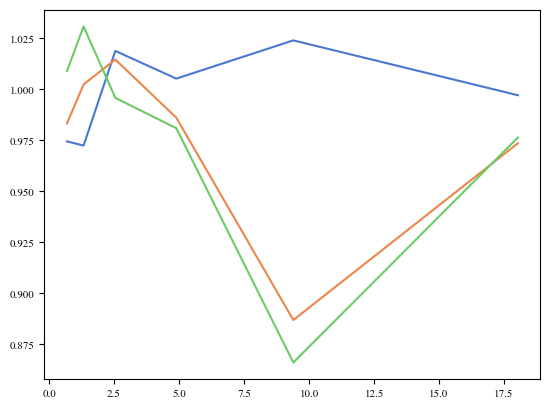

In [115]:
# plt.plot(r, np.array(wgplussesDM_z3)[1])
plt.plot(r, np.array(wgplussesDM_z2)[2]/np.array(wgplussesDM_z3)[2])
plt.plot(r, np.array(wgplussesDM_z2)[2]/np.array(wgplussesDM_z4)[2])
plt.plot(r, np.array(wgplussesDM_z3)[2]/np.array(wgplussesDM_z4)[2])

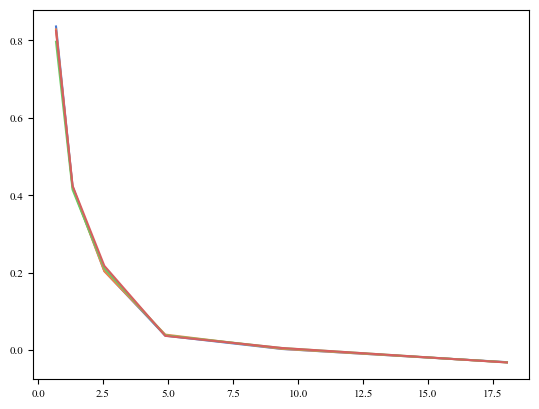

In [118]:
plt.plot(r, np.array(wgplussesDM_z3)[1])
plt.plot(r, np.array(wgplussesDM_z2)[1])
plt.plot(r, np.array(wgplussesDM_z4)[1])
plt.plot(r, np.array(wgplussesDM_z5)[1])
# plt.plot(r, np.array(wgplussesDM_z)[2],alpha=0.5)

### 20 corrs

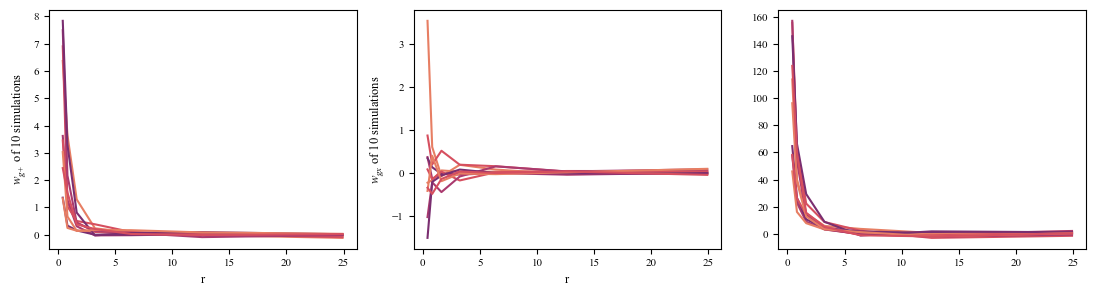

In [225]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(33/3,3))
for j in range(25,35):
    ax[0].plot(r, wgplussesDM_z[j], label=f'{j}')
#     print(wgplusses_z[j])
    ax[1].plot(r, wgcrossesDM_z[j], label=f'{j}')
#     print(wgcrosses_z[j])
    #print(xip[860+j])
    ax[2].plot(r, ggsDM_z[j], label=f'{j}')
    
ax[0].set_ylabel(r"$w_{g+}$ of 10 simulations")
ax[0].set_xlabel("r")
# ax[0].legend(); ax[1].legend()
ax[1].set_ylabel(r"$w_{gx}$ of 10 simulations")
ax[1].set_xlabel("r")
fig.tight_layout()

### difference between DM and proxy

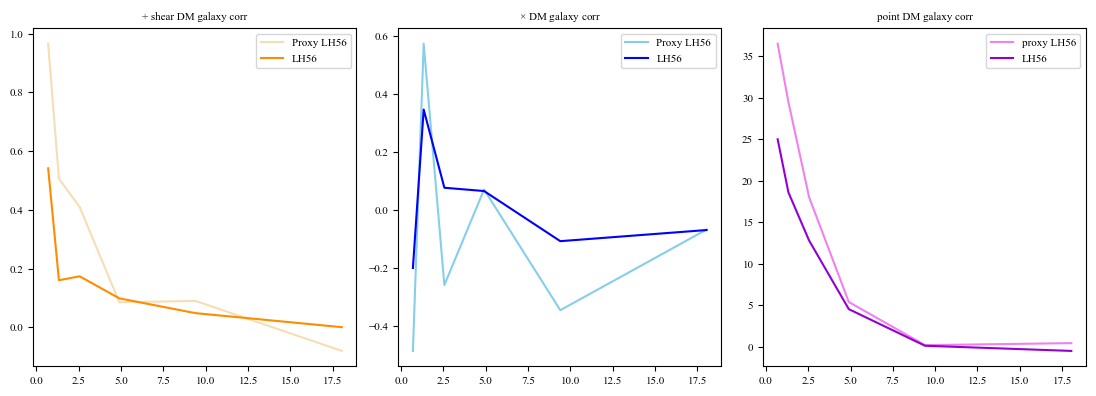

In [65]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(33/3,4))
j=56
for p in range(9,10):
    ax[0].plot(r, wgplusses_z[j], label=f'Proxy LH{j}', color='wheat')
    ax[0].plot(r, wgplussesDM_z[j], label=f'LH{j}', color='darkorange')
    ax[0].legend()
    ax[0].set_title('+ shear DM galaxy corr')
    ax[1].plot(r, wgcrosses_z[j], label=f'Proxy LH{j}', color='skyblue')
    ax[1].plot(r, wgcrossesDM_z[j], label=f'LH{j}', color='blue')
    ax[1].legend()
    ax[1].set_title(r'$\times$ DM galaxy corr')
    ax[2].plot(r, ggs_z[j], label=f'proxy LH{j}', color='violet')
    ax[2].plot(r, ggsDM_z[j], label=f'LH{j}', color='darkviolet')
    ax[2].legend()
    ax[2].set_title(r'point DM galaxy corr')
    
fig.tight_layout()

### Difference between axes 

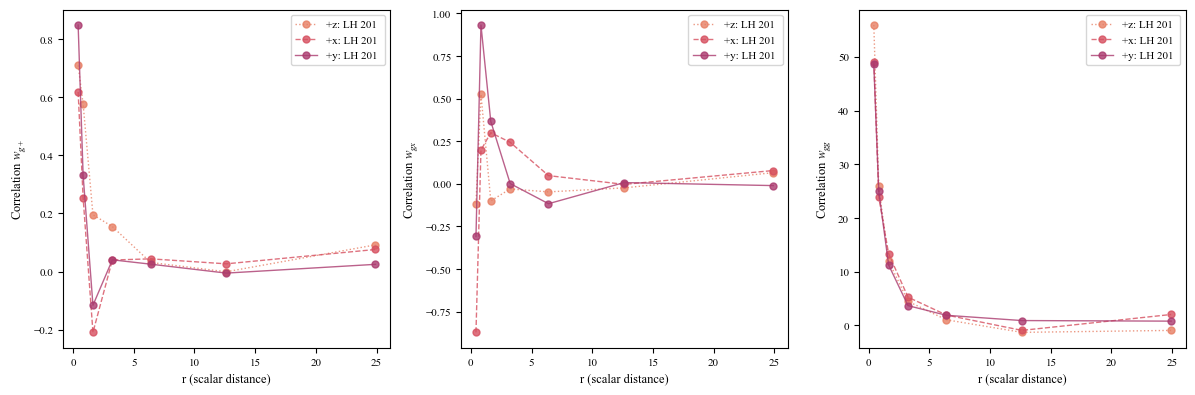

In [221]:
sns.set_palette("flare", 4)

filenum=201
axes = ['x', 'y', 'z']
fig, ax = plt.subplots(1, 3,figsize=(12, 4))

ax[0].errorbar(r,wgplusses[filenum],
     label=f'+z: LH {filenum} ',linestyle=':', linewidth=1, marker='o',markersize=5,alpha=0.8)
ax[0].errorbar(r,wgplusses[filenum+1000],
 label=f'+x: LH {filenum} ', linewidth=1,linestyle='--', marker='o',markersize=5,alpha=0.8)
ax[0].errorbar(r,wgplusses[filenum+2000],
 label=f'+y: LH {filenum}', linewidth=1, marker='o',markersize=5,alpha=0.8)
ax[0].legend()
ax[0].set_xlabel(r'r (scalar distance)')
ax[0].set_ylabel(r'Correlation $w_{g+}$')
ax[1].errorbar(r,wgcrosses[filenum],
     label=f'+z: LH {filenum} ',linestyle=':', linewidth=1, marker='o',markersize=5,alpha=0.8)
ax[1].errorbar(r,wgcrosses[filenum+1000],
 label=f'+x: LH {filenum} ',linestyle='--', linewidth=1, marker='o',markersize=5,alpha=0.8)
ax[1].errorbar(r,wgcrosses[filenum+2000],
 label=f'+y: LH {filenum}', linewidth=1, marker='o',markersize=5,alpha=0.8)
ax[1].legend()
ax[1].set_xlabel(r'r (scalar distance)')
ax[1].set_ylabel(r'Correlation $w_{gx}$')
ax[2].errorbar(r,ggs[filenum],
     label=f'+z: LH {filenum} ',linestyle=':', linewidth=1, marker='o',markersize=5,alpha=0.8)
ax[2].errorbar(r,ggs[filenum+1000],
 label=f'+x: LH {filenum} ',linestyle='--', linewidth=1, marker='o',markersize=5,alpha=0.8)
ax[2].errorbar(r,ggs[filenum+2000],
 label=f'+y: LH {filenum}', linewidth=1, marker='o',markersize=5,alpha=0.8)
ax[2].legend()
ax[2].set_xlabel(r'r (scalar distance)')
ax[2].set_ylabel(r'Correlation $w_{gg}$')

plt.tight_layout()

### Average seperated into axes

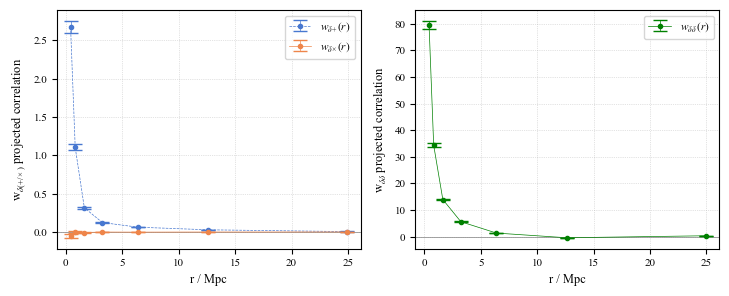

In [227]:
sqrtNz = np.sqrt(wgplussesDM_z.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(22/3,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wgplussesDM_z,axis=0), yerr=np.std(wgplussesDM_z,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wgcrossesDM_y,axis=0), yerr=np.std(wgcrossesDM_z,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(ggsDM_z,axis=0), yerr=np.std(ggsDM_z,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='green',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
# ax[0].set_ylim(-0.1*np.abs(ax[0].get_ylim()).max(), np.abs(ax[0].get_ylim()).max())
# ax[1].set_ylim(-0.1*np.abs(ax[1].get_ylim()).max(), np.abs(ax[1].get_ylim()).max())
# ax[0].set_title(r"LH (0 - 1000) average position-shape")
ax[0].set_xlabel("r / Mpc")
ax[0].set_ylabel(r"w$_{\delta (+/\times)}$ projected correlation")
ax[0].legend() ; ax[1].legend()
# ax[1].set_title("LH (0 - 1000) average auto correlation")
ax[1].set_xlabel("r / Mpc")
ax[1].set_ylabel(r"w$_{\delta\delta}$ projected correlation")
fig.tight_layout()

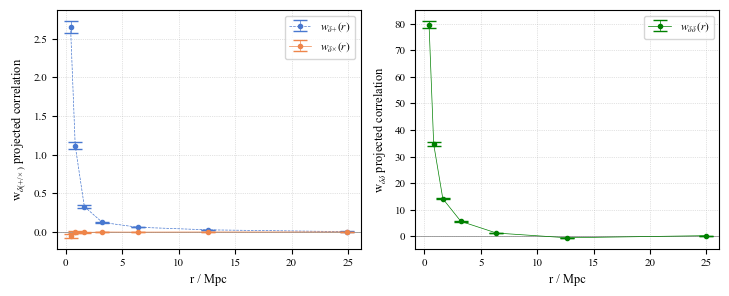

In [228]:
sqrtNy = np.sqrt(wgplussesDM_y.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(22/3,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wgplussesDM_y,axis=0), yerr=np.std(wgplussesDM_y,axis=0)/sqrtNy, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wgcrossesDM_y,axis=0), yerr=np.std(wgcrossesDM_y,axis=0)/sqrtNy, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(ggsDM_y,axis=0), yerr=np.std(ggsDM_y,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='green',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
# ax[0].set_ylim(-0.1*np.abs(ax[0].get_ylim()).max(), np.abs(ax[0].get_ylim()).max())
# ax[1].set_ylim(-0.1*np.abs(ax[1].get_ylim()).max(), np.abs(ax[1].get_ylim()).max())
# ax[0].set_title(r"LH (0 - 1000) average position-shape")
ax[0].set_xlabel("r / Mpc")
ax[0].set_ylabel(r"w$_{\delta (+/\times)}$ projected correlation")
ax[0].legend() ; ax[1].legend()
# ax[1].set_title("LH (0 - 1000) average auto correlation")
ax[1].set_xlabel("r / Mpc")
ax[1].set_ylabel(r"w$_{\delta\delta}$ projected correlation")
fig.tight_layout()

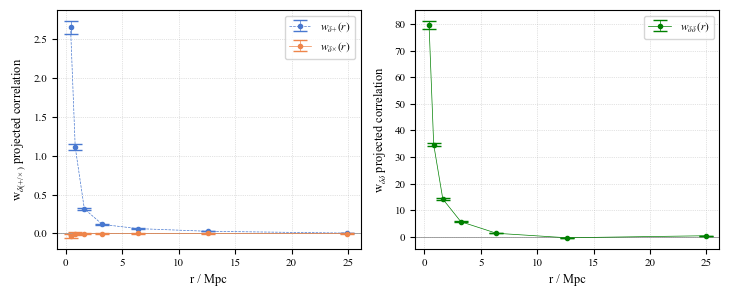

In [229]:
sqrtNx = np.sqrt(wgplussesDM_x.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(22/3,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wgplussesDM_x,axis=0), yerr=np.std(wgplussesDM_x,axis=0)/sqrtNx, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wgcrossesDM_x,axis=0), yerr=np.std(wgcrossesDM_x,axis=0)/sqrtNx, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(ggsDM_x,axis=0), yerr=np.std(ggsDM_x,axis=0)/sqrtNx, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='green',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
# ax[0].set_ylim(-0.1*np.abs(ax[0].get_ylim()).max(), np.abs(ax[0].get_ylim()).max())
# ax[1].set_ylim(-0.1*np.abs(ax[1].get_ylim()).max(), np.abs(ax[1].get_ylim()).max())
# ax[0].set_title(r"LH (0 - 1000) average position-shape")
ax[0].set_xlabel("r / Mpc")
ax[0].set_ylabel(r"w$_{\delta (+/\times)}$ projected correlation")
ax[0].legend() ; ax[1].legend()
# ax[1].set_title("LH (0 - 1000) average auto correlation")
ax[1].set_xlabel("r / Mpc")
ax[1].set_ylabel(r"w$_{\delta\delta}$ projected correlation")
fig.tight_layout()

#### y average - z average

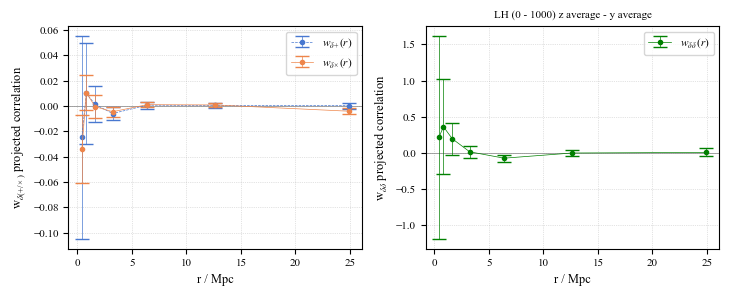

In [231]:
sqrtNy = np.sqrt(wgplussesDM_y.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(22/3,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wgplussesDM_y-wgplussesDM_z,axis=0), yerr=np.std(wgplussesDM_y,axis=0)/sqrtNy, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wgcrossesDM_y-wgcrossesDM_z,axis=0), yerr=np.std(wgcrossesDM_y,axis=0)/sqrtNy, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(np.array(ggsDM_y)-np.array(ggsDM_z),axis=0), yerr=np.std(ggsDM_y,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='green',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
# ax[0].set_ylim(-0.1*np.abs(ax[0].get_ylim()).max(), np.abs(ax[0].get_ylim()).max())
# ax[1].set_ylim(-0.1*np.abs(ax[1].get_ylim()).max(), np.abs(ax[1].get_ylim()).max())
plt.title(r"LH (0 - 1000) z average - y average")
ax[0].set_xlabel("r / Mpc")
ax[0].set_ylabel(r"w$_{\delta (+/\times)}$ projected correlation")
ax[0].legend() ; ax[1].legend()
# ax[1].set_title("LH (0 - 1000) average auto correlation")
ax[1].set_xlabel("r / Mpc")
ax[1].set_ylabel(r"w$_{\delta\delta}$ projected correlation")
fig.tight_layout()

### Total average

/var/folders/2k/4lvm79j14sg5_v8dqx8tly7h0000gn/T/ipykernel_55716/2957648537.py:33: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(
/var/folders/2k/4lvm79j14sg5_v8dqx8tly7h0000gn/T/ipykernel_55716/2957648537.py:36: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[0].set_xlim(0,30)
/var/folders/2k/4lvm79j14sg5_v8dqx8tly7h0000gn/T/ipykernel_55716/2957648537.py:37: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(
/var/folders/2k/4lvm79j14sg5_v8dqx8tly7h0000gn/T/ipykernel_55716/2957648537.py:40: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[1].set_xlim(0,30)


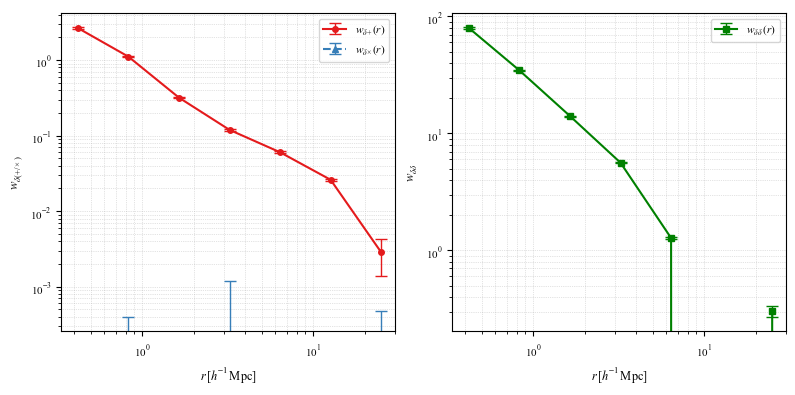

In [234]:
sns.set_palette("Set1")
sqrtN = np.sqrt(wgplusses.shape[0])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))  # Width-to-height ratio adjusted for a clean layout
ax[0].axhline(0, c='0.5', linewidth=1, linestyle='--')
ax[0].errorbar(
    r, np.mean(wgplusses, axis=0), yerr=np.std(wgplusses, axis=0) / sqrtN,
    linewidth=1.5, linestyle='-', elinewidth=1, capsize=4,
    label=r'$w_{\delta{+}}\,(r)$', marker='o', markersize=4
)
ax[0].errorbar(
    r, np.mean(wgcrosses, axis=0), yerr=np.std(wgcrosses, axis=0) / sqrtN,
    linewidth=1.5, linestyle='--', elinewidth=1, capsize=4,
    label=r'$w_{\delta{\times}}\,(r)$', marker='^', markersize=4
)

# Plot the data for wdd
ax[1].axhline(0, c='0.5', linewidth=1, linestyle='--')
ax[1].errorbar(
    r, np.mean(ggs, axis=0), yerr=np.std(ggs, axis=0) / sqrtN,
    linewidth=1.5, elinewidth=1, capsize=4, color='green',
    label=r'$w_{\delta\delta}\,(r)$', marker='s', markersize=4
)

# Grid and scaling
for axis in ax:
    axis.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
    axis.set_xscale('log')  # Example for log scale x-axis
    axis.set_yscale('log')  # Example for log scale y-axis
    axis.set_xlim(np.min(r) * 0.8, np.max(r) * 1.2)

# Adjust y-limits to be symmetric
ax[0].set_ylim(
    -0.1 * np.abs(ax[0].get_ylim()).max(), np.abs(ax[0].get_ylim()).max()
)
ax[0].set_xlim(0,30)
ax[1].set_ylim(
    -0.1 * np.abs(ax[1].get_ylim()).max(), np.abs(ax[1].get_ylim()).max()
)
ax[1].set_xlim(0,30)

# Axis labels and titles
ax[0].set_xlabel(r"$r \, [h^{-1} \, \mathrm{Mpc}]$")
ax[0].set_ylabel(r"$w_{\delta(+/\times)}$")
ax[0].legend()

ax[1].set_xlabel(r"$r \, [h^{-1} \, \mathrm{Mpc}]$")
ax[1].set_ylabel(r"$w_{\delta\delta}$")
ax[1].legend()

# Adjust layout and save
fig.tight_layout()
plt.savefig(
    '/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/avg_correlations_publishable.png',
    dpi=300, bbox_inches='tight'
)
plt.show()

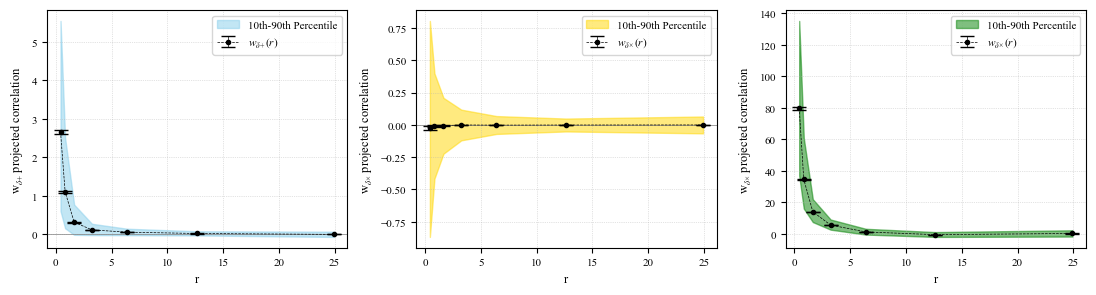

In [235]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(33/3,3))
lower_bound = np.percentile(wgplusses, 10, axis=0)
upper_bound = np.percentile(wgplusses, 90, axis=0)

ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wgplusses,axis=0), color='k',yerr=np.std(wgplusses,axis=0)/sqrtN, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)


# Fill between the 10th and 90th percentiles to highlight the density
ax[0].fill_between(r, lower_bound, upper_bound, color='skyblue', alpha=0.5, label='10th-90th Percentile')


ax[0].set_xlabel("r")
ax[0].set_ylabel(r"w$_{\delta {+}}$ projected correlation")
ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax[0].legend()

lower_bound = np.percentile(wgcrosses, 10, axis=0)
upper_bound = np.percentile(wgcrosses, 90, axis=0)

ax[1].errorbar(r,np.mean(wgcrosses,axis=0), color='k', yerr=np.std(wgcrosses,axis=0)/sqrtN, linewidth=0.5, linestyle='--', elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta{\times}}\,(r)$', marker='o',markersize=3)
ax[1].fill_between(r, lower_bound, upper_bound, color='gold', alpha=0.5, label='10th-90th Percentile')
ax[1].set_xlabel("r")
ax[1].set_ylabel(r"w$_{\delta{\times}}$ projected correlation")
ax[1].legend()
lower_bound = np.percentile(ggs, 10, axis=0)
upper_bound = np.percentile(ggs, 90, axis=0)
ax[2].errorbar(r,np.mean(ggs,axis=0), color='k', yerr=np.std(ggs,axis=0)/sqrtN, linewidth=0.5, linestyle='--', elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta{\times}}\,(r)$', marker='o',markersize=3)
ax[2].fill_between(r, lower_bound, upper_bound, color='green', alpha=0.5, label='10th-90th Percentile')
ax[2].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax[2].set_xlabel("r")
ax[2].set_ylabel(r"w$_{\delta{\times}}$ projected correlation")
ax[2].legend()
#ax[0].set_ylim(-0.1*np.abs(ax[0].get_ylim()).max(), np.abs(ax[0].get_ylim()).max())
# ax[1].set_ylim(-np.abs(ax[1].get_ylim()).max(), np.abs(ax[1].get_ylim()).max())
fig.tight_layout()
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/avg percentile correlations.png', dpi=300)

## Dividing out by w$_{\delta\delta}$

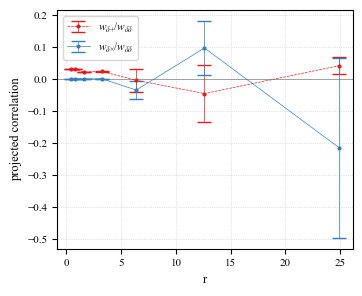

In [239]:
d_wgplusses = wgplusses/ggs
d_wgcrosses = wgcrosses/ggs

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(11/3,3))
ax.axhline(0,c='0.5',linewidth=0.5)
ax.errorbar(r,np.mean(d_wgplusses,axis=0), yerr=np.std(d_wgplusses,axis=0)/sqrtN, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}/w_{\delta\delta}$', marker='o',markersize=2)
ax.errorbar(r,np.mean(d_wgcrosses,axis=0), yerr=np.std(d_wgcrosses,axis=0)/sqrtN, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}/w_{\delta\delta}$', marker='o',markersize=2)
ax.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
#ax.set_ylim(-np.abs(ax.get_ylim()).max(), 0.4*np.abs(ax.get_ylim()).max())
# ax[0].set_title(r"LH (0 - 1000) average position-shape")
ax.set_xlabel("r")
ax.set_ylabel(r"projected correlation")
ax.legend() 
fig.tight_layout()
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/divide by w_mm.png', dpi=300)

(-0.2, 0.2)

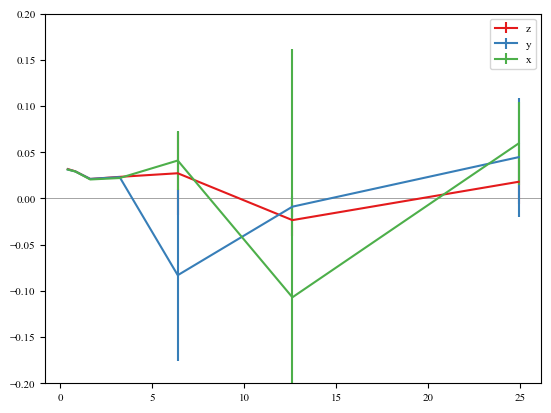

In [237]:
plt.axhline(0,c='0.5',linewidth=0.5)
plt.errorbar(r, np.mean(wgplussesDM_z/ggsDM_z,axis=0), yerr=np.std(wgplussesDM_z/ggsDM_z,axis=0)/np.sqrt(1000),label='z')
plt.errorbar(r, np.mean(wgplussesDM_y/ggsDM_y,axis=0), yerr=np.std(wgplussesDM_y/ggsDM_y,axis=0)/np.sqrt(1000),label='y')
plt.errorbar(r, np.mean(wgplussesDM_x/ggsDM_x,axis=0), yerr=np.std(wgplussesDM_x/ggsDM_x,axis=0)/np.sqrt(1000),label='x')

plt.legend()
plt.ylim([-0.2,0.2])

In [214]:
r

0.4214638316377758
0.831837364125269
1.6417859574473996
3.24037034920393
6.395474362763518
12.622659732340145
24.9131697948975


### r*w(r) vs r

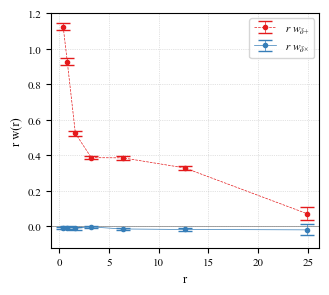

In [238]:
r_wgplusses = wgplusses*r
r_wgcrosses = wgcrosses*r

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10/3,3))
ax.axhline(0,c='0.5',linewidth=0.5)
ax.errorbar(r,np.mean(r_wgplusses,axis=0), yerr=np.std(r_wgplusses,axis=0)/sqrtN, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$r$ $w_{\delta{+}}$', marker='o',markersize=3)
ax.errorbar(r,np.mean(r_wgcrosses,axis=0), yerr=np.std(r_wgcrosses,axis=0)/sqrtN, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$r$ $w_{\delta {\times}}$', marker='o',markersize=3)
ax.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax.set_ylim(-0.1*np.abs(ax.get_ylim()).max(), np.abs(ax.get_ylim()).max())
# ax[0].set_title(r"LH (0 - 1000) average position-shape")
ax.set_xlabel("r")
ax.set_ylabel(r"r w(r)")
ax.legend() 
fig.tight_layout()
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/r w(r)vsr.png', dpi=300)

# 2D correlations xi(rp, Pi)

In [47]:
import pickle

# Load the pickled file
file_path = "OUTPUT_CAMELS_LH_z/wgp_LH12.p"
with open(file_path, "rb") as file:
    data = pickle.load(file)

# Check if the unpickled data is a dictionary
if isinstance(data, dict):
    # If it's a dictionary, print all the keys
    sections = data.keys()
    print("Sections in the pickled file:")
    for section in sections:
        print(section)
else:
    print("The unpickled object is not a dictionary.")

Sections in the pickled file:
r
meanr
meanlogr
Pi
w3d
wx3d
noise3d
DS_3d
RS_3d
DD_3d
DSntot
RSntot


In [48]:
meanr = np.array(data['meanr'])
Pi = np.array(data['Pi'])
w3d = np.array(data['w3d'])
wx3d = np.array(data['wx3d'])
print(meanr.shape)
print(Pi)
print(w3d.ndim)
print(wx3d.shape)

(5, 6)
[-5. -3. -1.  1.  3.  5.]
2
(5, 6)


Text(0, 0.5, '$\\Pi$ [Mpc/h]')

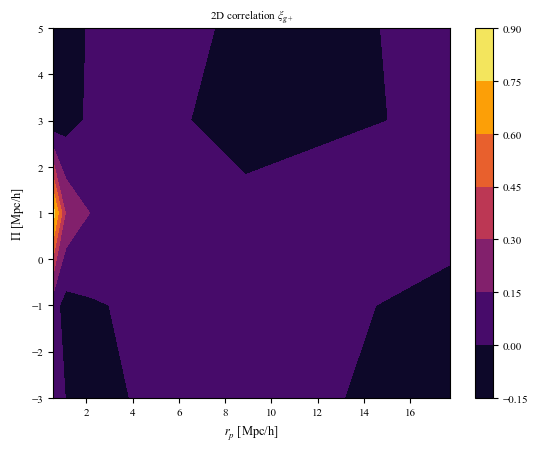

In [49]:
positions_x, y = np.meshgrid(r, Pi[1:])
positions_y = np.repeat(Pi[1:, np.newaxis], meanr.shape[1], axis=1)
# print(positions_y)
# plt.contourf(meanr,positions_y, w3d, cmap='inferno')
plt.contourf(positions_x,positions_y, w3d, cmap='inferno')
plt.colorbar()
plt.title(r'2D correlation $\xi_{g+}$')
plt.xlabel(r'$r_p$ [Mpc/h]')
plt.ylabel(r'$\Pi$ [Mpc/h]')